### Simple ANN-based Time Series Forecasting

This code aims to implement an LSTM Neural Network to predict a sequence of temporal data from a generic sinusoidal signal. For this, the Numpy and Pandas library were used to create and manipulate the data that will be worked on in this code, and the network was also implemented via Tensorflow open source library.

In [172]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
warnings.filterwarnings('ignore')

%matplotlib inline

In [173]:
time   = np.arange(0, 50, 0.1)
noise  = np.random.normal(scale=0.5, size=len(time))
signal = np.sin(time) + noise

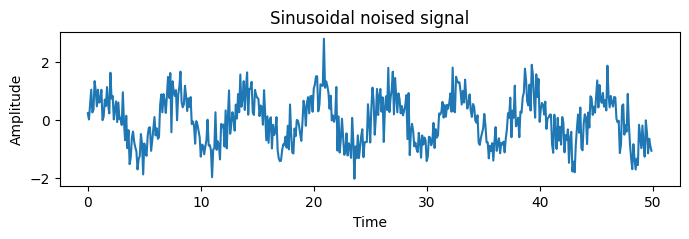

In [174]:
plt.figure(figsize = (8, 2))
plt.title('Sinusoidal noised signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(time, signal)
plt.show()

In [175]:
df = pd.DataFrame(dict(signal=signal), index=time, columns=['signal'])
df

,signal
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342
...,...
49.5,-0.423430
49.6,-1.136062
49.7,-0.630993
49.8,-0.886663


In [176]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[ :train_size, ], df.iloc[train_size:]

In [177]:
def create_set(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i + time_steps)]
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

time_steps = 1

In [178]:
X_train, y_train = create_set(train, train.signal, time_steps)
X_test, y_test = create_set(test, test.signal, time_steps)

In [179]:
print(f'X_train shape: {X_train.shape} \ny_train shape: {y_train.shape}')

X_train shape: (399, 1, 1) 
y_train shape: (399,)


In [180]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(1e-3))

In [181]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               66560     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 8, validation_split=0.1, verbose=1, shuffle=False)

Epoch 1/10
45/45 [==============================] - 3s 15ms/step - loss: 0.6190 - val_loss: 0.6053
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4938 - val_loss: 0.4829
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4215 - val_loss: 0.4320
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4014 - val_loss: 0.4234
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3988 - val_loss: 0.4221
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3981 - val_loss: 0.4211
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3976 - val_loss: 0.4201
Epoch 8/10
45/45 [==============================] - 0s 5ms/step - loss: 0.3972 - val_loss: 0.4191
Epoch 9/10
45/45 [==============================] - 0s 5ms/step - loss: 0.3969 - val_loss: 0.4184
Epoch 10/10
45/45 [==============================] - 0s 5ms/step - loss: 0.3966 - val_loss: 0.4177


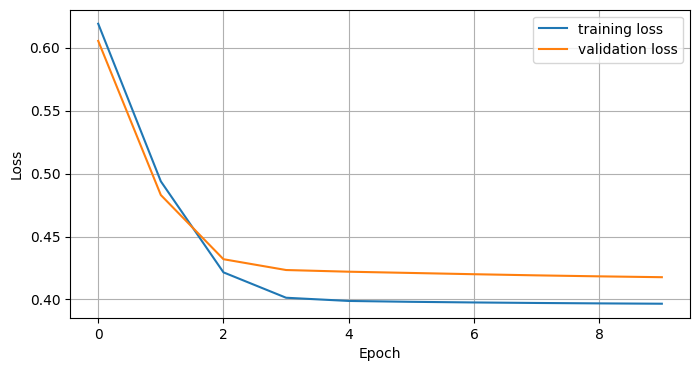

In [183]:
plt.figure(figsize=(8, 4))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.grid()
plt.show()

In [184]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


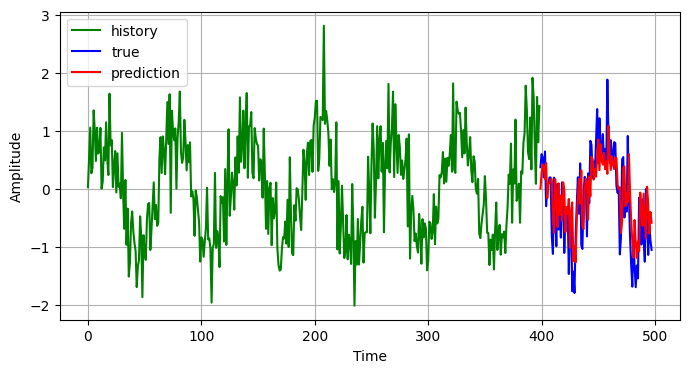

In [185]:
plt.figure(figsize=(8,4))
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, 'b', label='true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label='prediction')
plt.grid()
plt.legend()
plt.show()